# Sigmoid函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

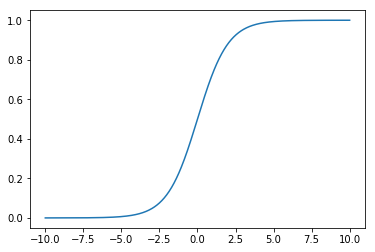

In [3]:
x = np.linspace(-10,10,500)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

#### $\hat p^{(i)} = \sigma(X_b^{(i)}\theta) = \frac{1}{1+e^{-X_b^{(i)}\theta}}$
#### $J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat p^{(i)}) + (1-y^{(i)})log(1-\hat p^{(i)})]$
没有公式解, 只能使用梯度下降法求解

# 逻辑回归梯度下降法公式推导

#### ${\sigma(t)}'= (1+e^{-t})^{-2}\cdot e^{-t}$
#### ${(log\  \sigma(t))}'=\frac{1}{\sigma(t)}\cdot{\sigma(t)}'=\frac{1}{\sigma(t)}\cdot(1+e^{-t})^{-2}\cdot e^{-t} = (1+e^{-t})^{-1}\cdot e^{-t}=1-\frac{1}{1+e^{-t}}=1-\sigma(t)$
### $\frac{d(y^{(i)}log\ \sigma(X_b^{(i)}\theta))}{d\theta_j}=y^{(i)}(1-\sigma(X_b^{(i)}\theta))\cdot X_j^{(i)}$

------------------------------------------------------------------------

#### ${(log(1 - \sigma(t)))}'=-\frac{1}{1+e^{-t}}=-\sigma(t)$
### $\frac{d\ [\ (1-y^{(i)})\ \cdot \ log(1-\sigma(X_b^{(i)}\theta))\ ]}{d\theta_j}=(1-y^{(i)})\cdot(-\sigma(X_b^{(i)}\theta))\cdot X_j^{(i)}$

---------------------------------------------------------------------------------

### $\frac{d\ J(\theta)}{d\ \theta_j}=\frac{1}{m}\sum_{i=1}^m (\sigma(X_b^{(i)}\theta)-y^{(i)})X_j^{(i)}=\frac{1}{m}\sum_{i=1}^m ({\hat y}^{(i)} -y^{(i)})X_j^{(i)}$

---------------------------------------------------------

### $J(\theta)=MSE(y, \hat y)$  
####    $\nabla J(\theta)=\begin{pmatrix} 
    \frac{\partial J}{\partial \theta_0} 
    \\ \frac{\partial J}{\partial \theta_1}
    \\ \ldots
    \\ \frac{\partial J}{\partial \theta_n}
    \end{pmatrix} = \frac{2}{m} 
    \begin{pmatrix}\\ 
    \sum_{i=1}^{m}(X_b^{(i)}\theta - y^{(i)})
    \\ \sum_{i=1}^{m}(X_b^{(i)}\theta - y^{(i)}) X_1^{(i)}
    \\ \sum_{i=1}^{m}(X_b^{(i)}\theta - y^{(i)}) X_2^{(i)}
    \\ \ldots
    \\ \sum_{i=1}^{m}(X_b^{(i)}\theta - y^{(i)}) X_n^{(i)}
    \end{pmatrix}=\frac{2}{m} \cdot X_b^T \cdot (X_b\theta - y) \tag{线性回归}$

------------------------------------------------

#### $\nabla J(\theta)=\begin{pmatrix} 
    \frac{\partial J}{\partial \theta_0} 
    \\ \frac{\partial J}{\partial \theta_1}
    \\ \ldots
    \\ \frac{\partial J}{\partial \theta_n}
    \end{pmatrix} = \frac{1}{m} 
    \begin{pmatrix}\\ 
    \sum_{i=1}^{m}(\sigma(X_b^{(i)}\theta) - y^{(i)})
    \\ \sum_{i=1}^{m}(\sigma(X_b^{(i)}\theta) - y^{(i)}) X_1^{(i)}
    \\ \sum_{i=1}^{m}(\sigma(X_b^{(i)}\theta)- y^{(i)}) X_2^{(i)}
    \\ \ldots
    \\ \sum_{i=1}^{m}(\sigma(X_b^{(i)}\theta) - y^{(i)}) X_n^{(i)}
    \end{pmatrix}=\frac{1}{m} \cdot X_b^T \cdot (\sigma(X_b\theta) - y)\tag{逻辑回归}$

# 使用自己封装的逻辑回归模型实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

X = X[y<2, :2]  # y<2筛选出2类, :2留2个特征, 方便后面可视化
y = y[y<2]
print(X.shape, y.shape)

(100, 2) (100,)


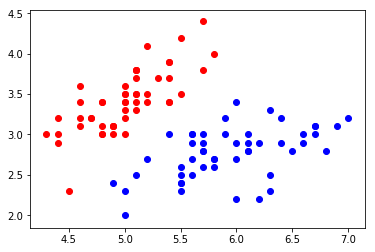

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from c26_LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [6]:
log_reg.score(X_test, y_test)

1.0

In [7]:
log_reg.predict_prob(X_test)

array([0.93292947, 0.98717455, 0.15541379, 0.18370292, 0.03909442,
       0.01972689, 0.05214631, 0.99683149, 0.98092348, 0.75469962,
       0.0473811 , 0.00362352, 0.27122595, 0.03909442, 0.84902103,
       0.80627393, 0.83574223, 0.33477608, 0.06921637, 0.21582553,
       0.0240109 , 0.1836441 , 0.98092348, 0.98947619, 0.08342411])

In [8]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [9]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [10]:
log_reg.coef_

array([ 3.01749692, -5.03046934])

In [11]:
log_reg.interception_

-0.6827383698993107

# 决策边界
### $\hat p= \sigma(\theta^T \cdot x_b) = \frac{1}{1+e^{-\theta^T\cdot x_b}}$
### $\hat y = \left \{ \begin{matrix}
\ \ 1,\ \ \  \hat p >=0.5\ ,\ \  \ \theta^T\cdot x_b >= 0\\
0,\ \ \  \hat p < 0.5 \ ,\ \  \ \theta^T\cdot x_b < 0
\end{matrix}\right.$

### 决策边界 : $\theta^T\cdot x_b = 0$
如果有两个特征 $\theta_0+\theta_1 x_1+\theta_2 x_2=0$

In [12]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_)/log_reg.coef_[1]

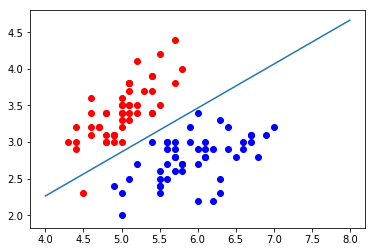

In [13]:
# 决策边界线
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)
plt.plot(x1_plot,x2_plot)

# 数据点
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.show()

In [15]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


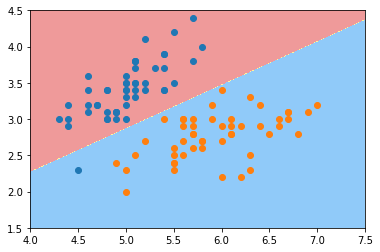

In [16]:
plot_decision_boundary(log_reg, axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## KNN 的 决策边界

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn_clf.score(X_test, y_test)

1.0

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


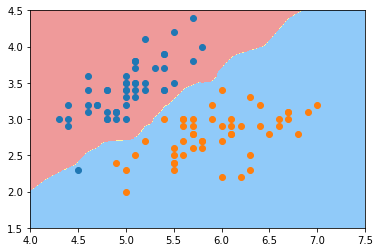

In [19]:
plot_decision_boundary(knn_clf, axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [20]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


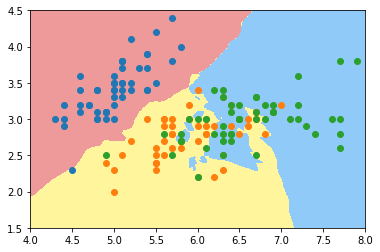

In [23]:
plot_decision_boundary(knn_clf_all, axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])
plt.show()

In [24]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


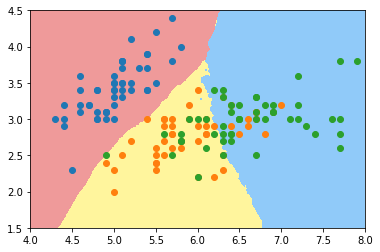

In [25]:
plot_decision_boundary(knn_clf_all, axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])
plt.show()